# Impact of Zero Location on System Model (Notch)

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf,step, tf2ss, ss2tf, bode
import scipy
from scipy.signal import residue

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found


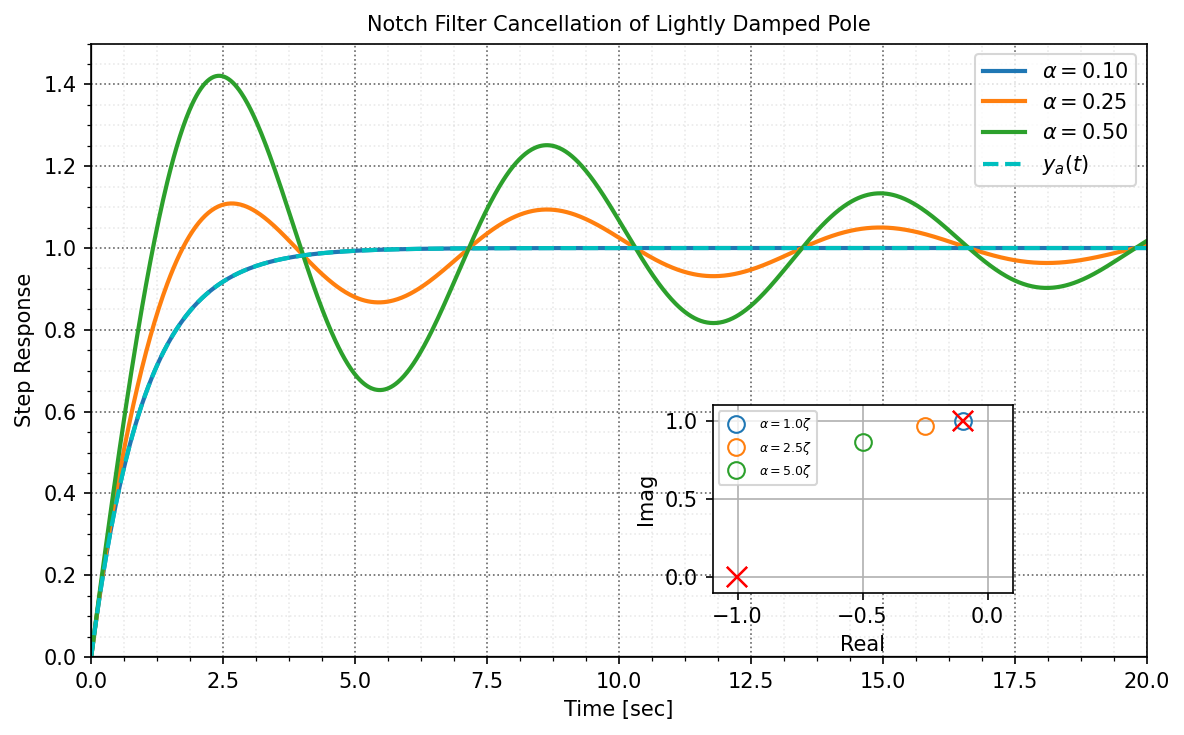

In [2]:
# Lecture 6-22
zeta = 0.1
wn = 1
tt = np.linspace(0,20,1000)
fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Step Response")
nicegrid(ax)

left, bottom, width, height = [0.6, 0.2, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
nicegrid(ax)
ax2.set_xlabel("Real")
ax2.set_ylabel("Imag")

for alp in np.array([0.1, 0.25, 0.5]):
    G = tf((1, 2*alp*wn, wn**2), np.convolve((1, 2*zeta*wn, wn**2),(1,1)))
    [yy,tt] = step(G,tt)
    ax.plot(tt,yy,label=r'$\alpha={:3.2f}$'.format(alp))

    ax2.plot(np.real(G.poles()),np.imag(G.poles()), 'x', ms=10, color='red')
    ax2.plot(np.real(G.zeros()),np.imag(G.zeros()), 'o', markerfacecolor='none', ms=8, label=r'$\alpha={:2.1f}\zeta$'.format(alp/zeta))
    
Ga = tf((1), (1,1))
[yya,tt] = step(Ga,tt)
ax.plot(tt,yya,'c--',label=r'$y_a(t)$')
ax.set_title(r"Notch Filter Cancellation of Lightly Damped Pole")
ax.legend()
ax2.legend(prop = { "size": 6 })
ax.set_ylim((0,1.5))
ax2.set_xlim((-1.1,0.1))
ax2.set_ylim((-0.1,1.1))
nicegrid(ax)
savefig("./figs/Zeros_Ex4_"+str(round(zeta,3))+".pdf", dpi=600)
plt.show()

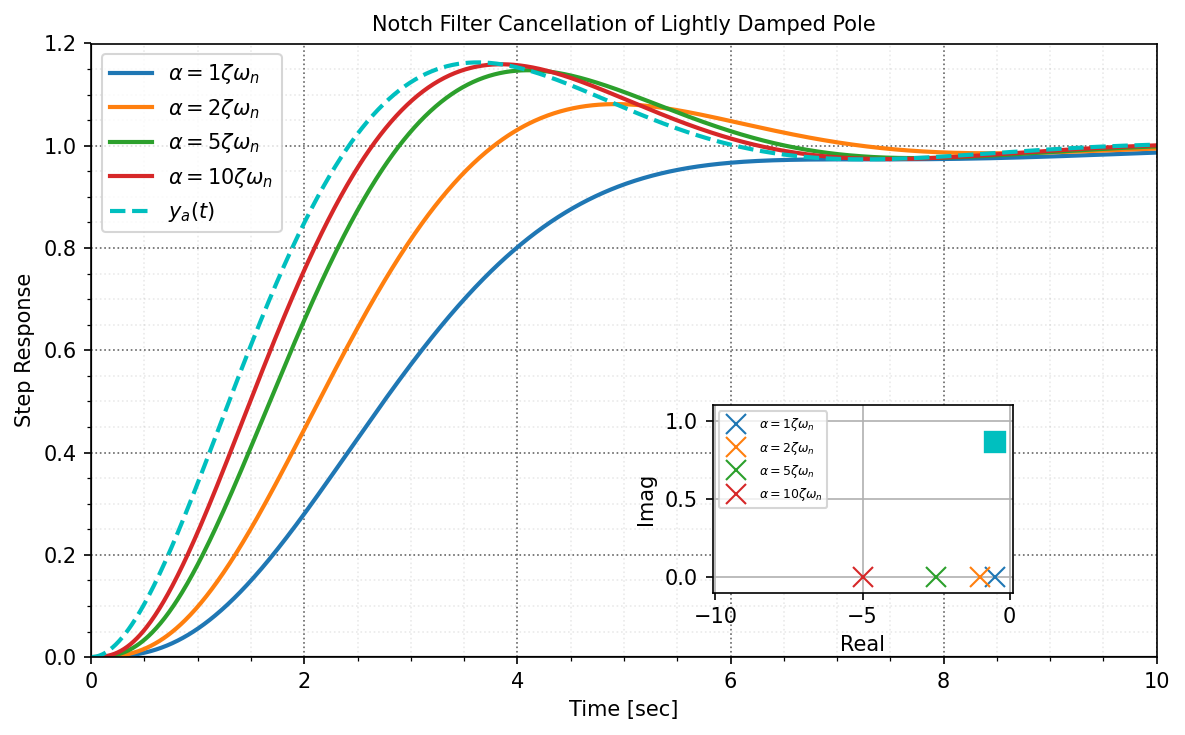

In [ ]:
# Lecture 4-22 -- add pole
zeta = 0.5
wn = 1
tt = np.linspace(0,10,1000)
fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Step Response")
nicegrid(ax)

left, bottom, width, height = [0.6, 0.2, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
nicegrid(ax)
ax2.set_xlabel("Real")
ax2.set_ylabel("Imag")

Ga = tf((wn**2), (1, 2*zeta*wn, wn**2))
for alp in np.array([1,2,5,10]):
    Gp = tf(1, (1/(alp*zeta*wn),1))
    G = Ga*Gp
    [yy,tt] = step(G,tt)
    ax.plot(tt,yy,label=r'$\alpha={:3.0f}\zeta\omega_n$'.format(alp))

    ax2.plot(np.real(Ga.poles()),np.imag(Ga.poles()), 'cs', ms=10)
    ax2.plot(np.real(Gp.poles()),np.imag(Gp.poles()), 'x', ms=10, label=r'$\alpha={:2.0f}\zeta\omega_n$'.format(alp))
    
[yya,tt] = step(Ga,tt)
ax.plot(tt,yya,'c--',label=r'$y_a(t)$')
ax.set_title(r"Notch Filter Cancellation of Lightly Damped Pole")
ax.legend()
ax2.legend(prop = { "size": 6 })
ax.set_ylim((0,1.2))
ax2.set_xlim((-10.1,0.1))
ax2.set_ylim((-0.1,1.1))
savefig("./figs/Zeros_Ex5_"+str(round(zeta,3))+".pdf", dpi=600)
plt.show()